In [14]:
!pip install scikit_plot

In [15]:
#imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

import scikitplot as skplot

In [2]:
bank = pd.read_csv('CC GENERAL.csv')

In [3]:
bank.columns = bank.columns.str.lower()

In [4]:
#check how many null values and data type in each varabie
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [5]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
bank.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<AxesSubplot:>

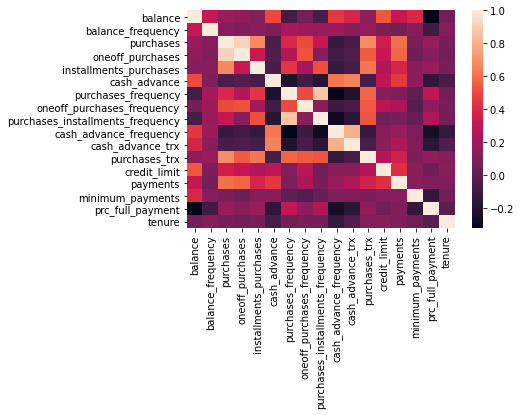

In [7]:
bank_corr = bank.corr()
sns.heatmap(bank_corr)

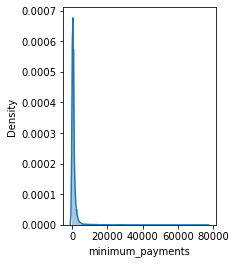

In [8]:
#clean data
#There are 1 missing data in credit_limit and 313 missing data in minimum_payments.
#since there is only one data missing in credit_limit, so we decided to drop it, but for the minimum_payments, we plotted the distribution first to see how the data looks like. 
plt.subplot(1,2,2)
sns.distplot(bank.minimum_payments.dropna())
plt.show()

In [9]:
#since the data is skewed to the right, we decided to use median fill the null value insteand of the mean
bank['minimum_payments'].fillna(bank['minimum_payments'].median(),inplace=True)

In [10]:
bank.dropna(inplace=True)

In [11]:
#confirm that we fill all the 
bank.isna().sum().sum()

0

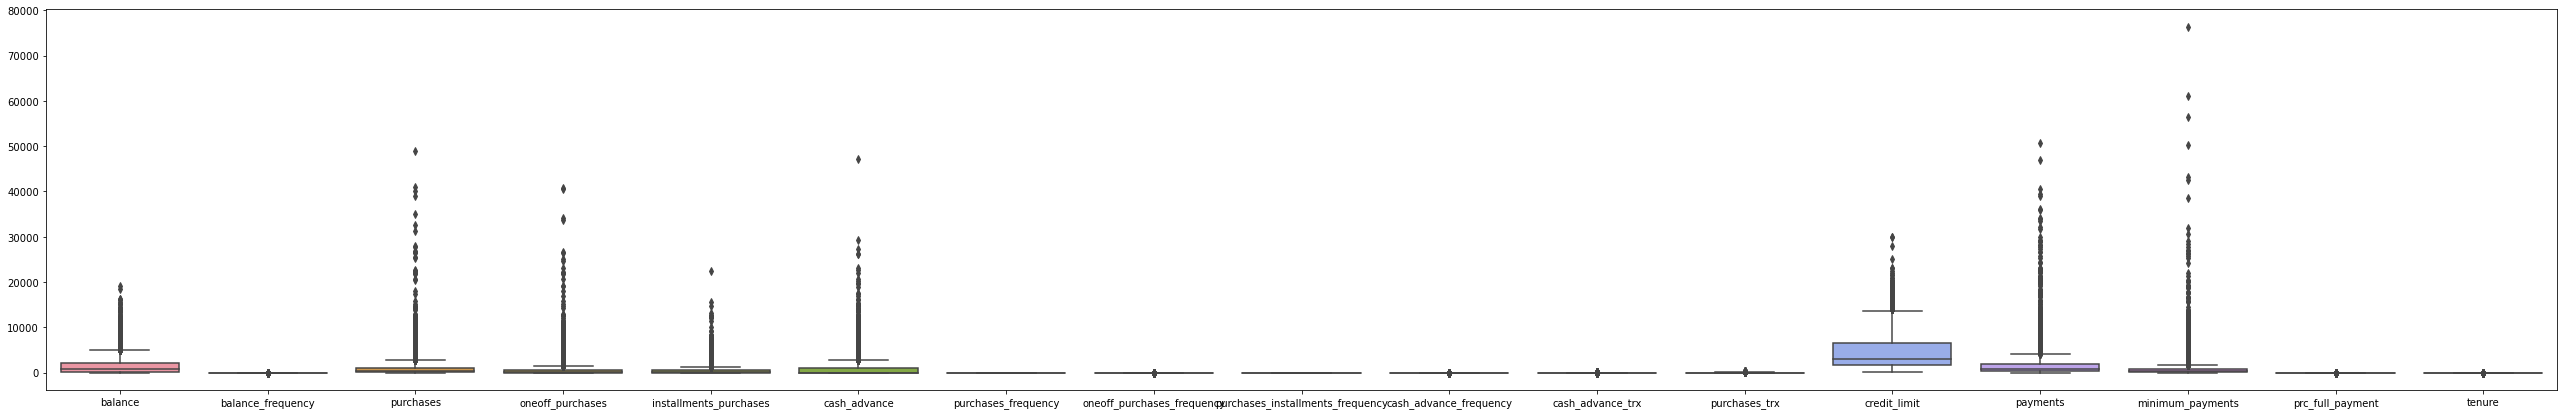

In [12]:
#we can find there are some outliers with several variables, but in this dataset we want to analyze all kind of customers, so we are not going to handle the outliers. 
plt.figure(figsize=(45,7))
sns.boxplot(data=bank)
plt.show()

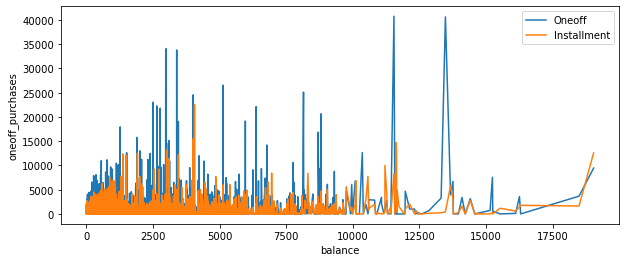

In [13]:
#check if there is a relationship between different types of purchases. 
plt.figure(figsize=(10,4))
sns.lineplot(bank['balance'],bank['oneoff_purchases'],label='Oneoff')
sns.lineplot(bank['balance'],bank['installments_purchases'],label="Installment")
plt.show()

In [16]:
#since the clustering can only have 1500 data each time, so we randomly select 1500 data from original dataset. We are looking for better method of sampling in the future.
bank_sample = bank.sample(n=1500)

In [18]:
#keep only numerical data
bank_num = bank_sample.drop(columns = 'cust_id')

In [20]:
#scale the data then put into dataframe
sc = StandardScaler()
sb = sc.fit_transform(bank_num)
sb = pd.DataFrame(sb, columns = bank_num.columns)

In [21]:
#check the data after scaler
sb.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.697032,-1.405714,0.312465,-0.403200,1.221500,-0.454722,0.033028,-0.666022,0.334014,-0.679496,-0.471955,-0.343883,-0.097658,0.076833,-0.373667,1.655276,0.34996
1,-0.273212,0.535099,5.941383,7.452412,0.759223,-0.454722,1.280970,2.835894,1.593017,-0.679496,-0.471955,1.428851,2.945880,3.518770,-0.256550,2.908101,0.34996
2,-0.411674,0.535099,0.038883,0.233276,-0.269890,-0.454722,0.033028,1.084936,-0.715156,-0.679496,-0.471955,-0.261430,-0.485017,-0.347177,-0.297547,-0.537171,0.34996
3,1.819416,0.535099,-0.536389,-0.403200,-0.469973,0.997936,-1.214915,-0.666022,-0.924989,1.982188,0.775228,-0.591241,0.732398,-0.212500,0.247154,-0.537171,0.34996
4,2.783081,0.535099,-0.536389,-0.403200,-0.469973,0.374305,-1.214915,-0.666022,-0.924989,0.207734,-0.160159,-0.591241,0.870741,0.094939,0.599448,-0.537171,0.34996
